Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 3 </h2>
    <h1>   </h1>
    <p>
        Profesor Marcelo Mendoza<br>
        Segundo Semestre 2022<br>    
        Fecha de entrega: Viernes 14 de octubre 22.00 horas
    </p>
    <br>
</center>

<br>

---

## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas. 

**IMPORTANTE**: 
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

# Introducción
Las últimas elecciones parlamentarias resultaron en la configuración de un Congreso fragmentado, en donde ningún pacto alcanza el 35% de los asientos. En total, hay 21 partidos representados repartidos en 8 pactos electorales. En este sentido, es importante encontrar alguna forma de entender el comportamiento de los legisladores mediante sus votos, cosa tal de entender cómo se organizan las fuerzas políticas de facto. Para ello, aplicaremos lo aprendido con Gaussian Mixture Models con las votaciones realizadas hasta el 31 de septiembre de 2022.


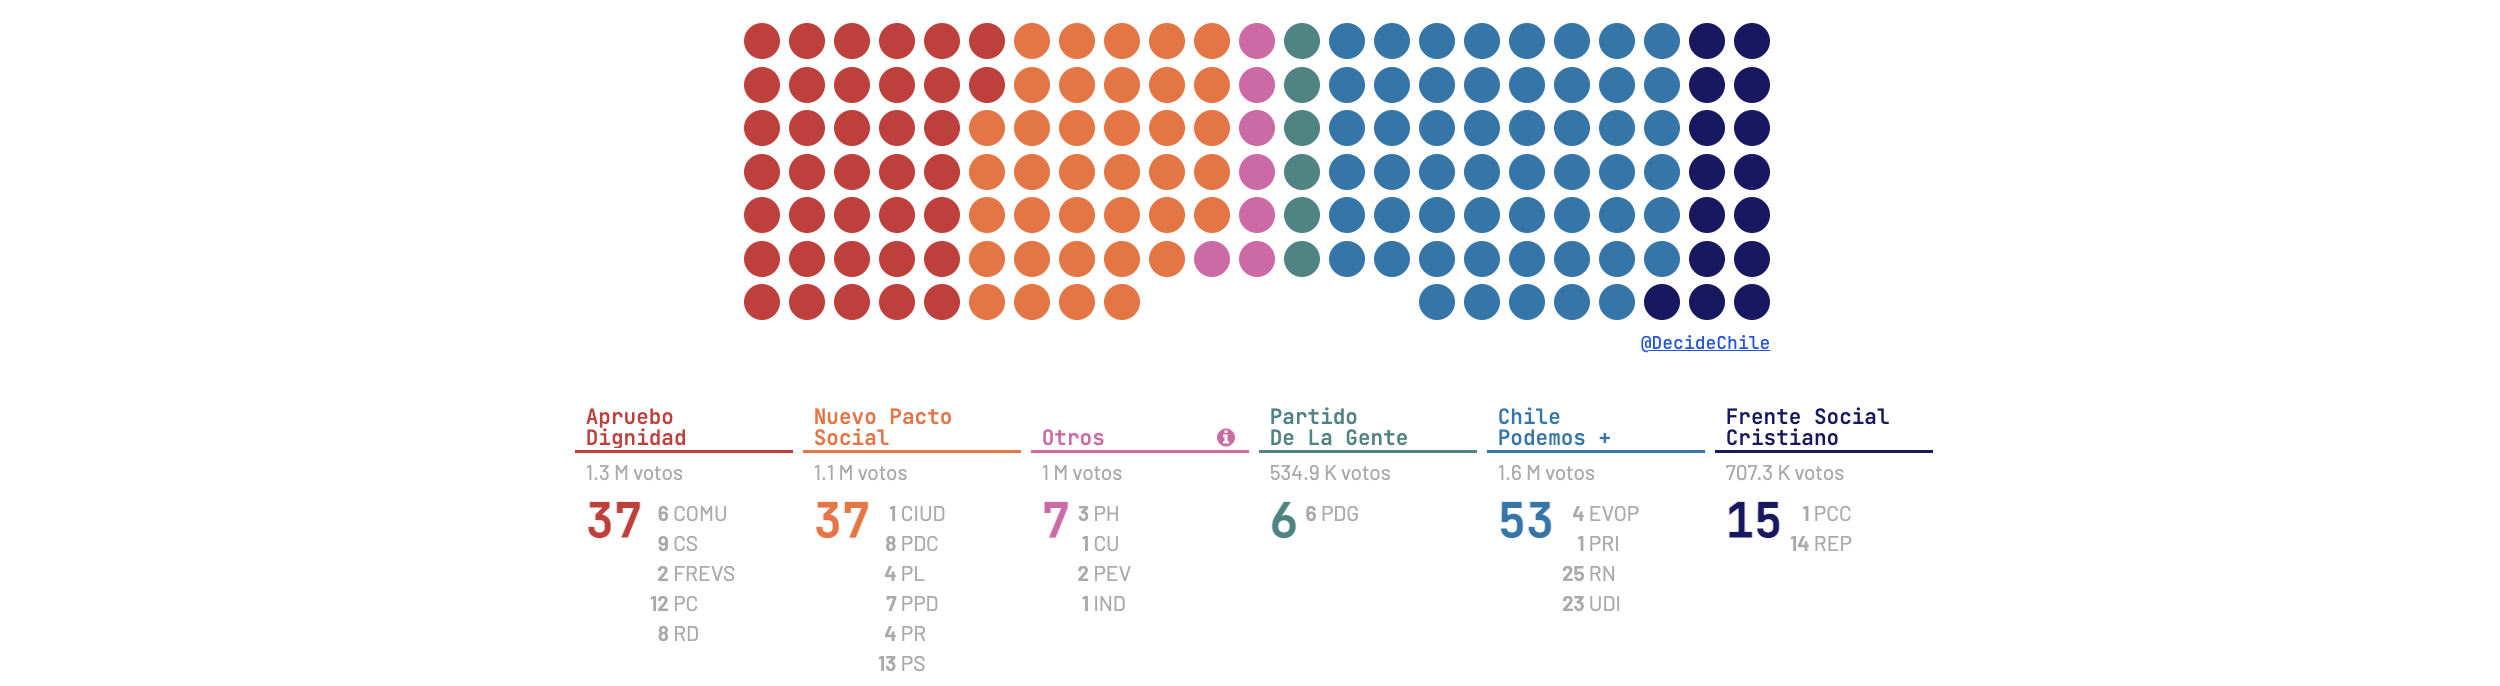
Más info en [este link](https://2021.decidechile.cl/#/ev/2021.nov/ct/2021.nov.D/)

# 0. Setup
En esta tarea trabajarás con 3 bases de datos
- X: voto individual da cada diputado por votación. -1 si votó en contra, 0 por abtensiones y +1 a favor. Si un legislador no vota, se asume como abstención.
- votes: información de una votación. Incluye fecha, descripción y tipo de votación.
- info: información de un legislador. Incluye distrito, pacto y partido.

In [1]:
import pandas as pd
import numpy as np

In [2]:
X = pd.read_csv('https://drive.google.com/uc?id=1aza6H6pI_fc1KXEInesxRSvBrXxCX-O9', index_col=0).fillna(0)
X.columns = [int(c) for c in X.columns]
X = X.sort_index()
X = X.reset_index(drop=True)
#Orden por primer apellido
X

,38467,38468,38469,38474,38475,38476,38477,38478,38481,38482,...,39203,39204,39205,39206,39209,39210,39211,39212,39213,39214
0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
151,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
152,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
153,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [3]:
votes = pd.read_csv('https://drive.google.com/uc?id=1ujxbWmI2oRqB7Zrh2wL9wkRwK8dhFuVF', index_col=0)
votes.head()

,datetime,description,type
38467,2022-03-16,La Cámara de Diputados manifiesta su más absol...,Proyecto Resolucion
38468,2022-03-16,La Cámara de Diputados manifiesta su más absol...,Proyecto Resolucion
38481,2022-03-22,La Cámara de Diputados solicita a S. E. el Pre...,Proyecto Resolucion
38482,2022-03-22,La Cámara de Diputados manifiesta su más absol...,Proyecto Resolucion
38483,2022-03-22,Solicita a S. E. el Presidente de la República...,Proyecto Resolucion


In [4]:
info = pd.read_excel('https://drive.google.com/uc?id=1UwqK5j-IbD1Ufpx4-5hBfUnvL2EzpfTB', index_col=0)
info.head()

,shortname,district,pact,party
"Romero Leiva, Agustín",Agustin Romero,8,FSC,REP
"Undurraga Vicuña, Alberto",Alberto Undurraga,8,NPS,DC
"Placencia Cabello, Alejandra",Alejandra Placencia,10,AD,PC
"Bernales Maldonado, Alejandro",Alejandro Bernales,26,NPS,PL
"Sepúlveda Soto, Alexis",Alexis Sepulveda,17,NPS,PR


# 1. Preguntas teóricas (1.5 pts)

### 1.1 ¿Que es un modelo Gaussian Mixtures? ¿En qué escenarios funciona bien y en qué mal?

Un modelo Gaussian Mixtures (GMM) es un modelo probabilístico de clustering de datos, en donde se usa una cantidad finita de distribuciones gaussanias, que reperesetan los clusters, para indicar con un grado de probabilidad en que cluster se encuentra cada dato. GMM utiliza *soft clustering*, es decir, indica la probabilidad de que un dato se encuentre en un cluster, a diferencia de definirlo concretamente.

GMM funciona bien cuando los datos no se distribuyen en patrones circulares, ya que GMM puede formar clusters con diversas formas, no solo circulares, como es el caso de k-means. De este manera, GMM se puede ajustar fielmente a la forma de los datos, clasificando los datos de manera precisa. Adicionalmente, al usar soft clustering, GMM puede mostrar más de cluster al cual podría pertenecer un dato, lo que puede ayudar en ciertos problemas de manejao de datos. 

GMM  no se desempeña tan optimamente cuando se toma en cuenta el tiempo y la memoria utilizada, ya que es un algoritmo de clasificación que demora más y utiliza más recursos que algo como k-means. 

### 1.2 Investiga sobre el hiperparámetro covariance_type. ¿Qué es la matriz de covarianza? ¿Qué son y en qué casos serviría aplicar cada uno de los valores que puede tomar covariance_type (full, spherical, diag, tied)?

El hiperparámetro covariance_type es la forma en la cual se arma la matriz de covarianza, que es lo que le da, en parte, el tipo de elipse que toman los clusters. La matriz de covarianza es una matriz cuadrada que indica la covarianza entre todos los datos del dataset que se representa en la matriz. Esta sirve para ver la correlación entre features o datos. 

GMM tiene 4 covariance_types. *Full* indica que los clusters se comportan y se forman de manera independiente entre sí. *Tied* hace que todos los clusters tengan la misma forma, sin importar cual sea. *Diagonal* hace que los clusters se ajusten a los ejes del espacio dimensional en donde se encuentran y desde ahi nace su forma y *Spherical* es como *diagonal*, pero aparte de estar ajustados a los ejes, todos los clusters tienen forma circular (o esférica en dimensiones >2).

Cada uno de estos tipos tienen usos en donde brillan. *Full* sirve para ver como clusters que no necesariamente tienen relación se comportan en relación a cada uno, como es el caso de tendencias en los grupos de gente, en donde no necesariamente los grupos tienen una distribución igua. *Tied* ayuda a evaluar los clusters de manera igualitaria, para ver como se puede ajustar grupos de datos en formas iguales, esto sirve para crear grupos homogeneos con los que se pueda comparar facilmente. *Diagonal* sirve para ajustar los clusters a las features que se estan evaluando, esto sirve para poder tener una referencia de los datos frente a las caracterisiticas que se toman en consideración. *Spherical* ayuda a crear clusters de formas iguales que a la vez se ajustan a los ejes, esto ayudando a formar grupos con un comportamietno parecido que a la vez se comporten de manera que se puede estudiar directamente la influencia de los distintos ejes o features. 

### 1.3 ¿Qué significa que GMM sea un modelo generativo?

Que GMM sea un modelo generativo significa que incluye la distribución de los datos en sí, es decir, predice, con una probabilidad específica, de que un dato se encuentra clasificado en algún cluster en específico.

### 1.4 ¿Qué es el algoritmo Expectation-Maximization? ¿Qué estima? ¿Cuál es su relación y diferencia con K-Means?
[Respuesta]
El algoritmo Expectation-Maximization es un algoritmo iterativo que encuentra parametros locales con la mayor exactitud posible. Sirve para formar clusters de datos al encontrar una relación entre los datos de un cluster. EM estima parámetros de modelos estadisticos, como un modelo Gaussiano, el cual usa los parámetros para ajustr distribuciones a los clusters. Su relación con K-means es que ambos algoritmos se encargan de clusterizar y agrupar datos en diversos grupos, pero se diferencian en que K-means utiliza hard-clustering al atribuir un cluster por dato, mientras que EM utiliza soft-clustering al entregar la posibilidad de que un dato se encuentre en los diversos clusters creados. Además, EM utiliza técnicas probabilísticas para crear clusters, mientras K-means utiliza distancias para agrupar datos.

### 1.5 Investiga sobre Bayesian Information Criterion y Akaike Information Criterion. ¿Qué son y para qué sirven?
[Respuesta]
Bayesian Information Criterion es un criterio para encontrar el mejor modelo que se ajusta un set de datos. Toma en cuenta la cantidad de parámetros y peneliza a los modelos que son extremadamente complejos.

Akaike Information Criterion es criterio que mide la calidad relarita de un modelo que se ajusta sobre un set de datos y permite determinar el mejor modelo de un cantidad de modelos finitos. Sirve para encontrar el mejor modelo, tomando en cuenta su precición, su complejidad y la cantitdad de datos que toma en cuenta el modelo en cuestión.

Ambos criterios se relacionan profundamente, pues ambos tienen la misma funcionalidad al encontrar el mejor modelo. La diferencia radica en que BIC penaliza de mayor manera a los modelos más complejos al comparalo con AIC. Adicionalmente, BIC toma en cuenta la cantidad de datos mientras que AIC no.

### 1.6 Investiga sobre Bayesian Gaussian Mixture Models. ¿Qué es y para qué sirve?

Bayesian Gaussian Mixture Models (BGMM) es una variante del GMM, el cual además de ser un modelo probabilistico de clustering de datos que utiliza EM, también es capaz de encontrar el número óptimo de clusters al otorgarle "pesos" a cada cluster, lo que permite evaluar cuando un nuevo cluster es irrelevante o detrimental para el análisis de datos.


# 2. Gaussian Mixtures Model (2.5 ptos)
### 2.1 Visualización inicial
Aplica PCA a las votaciones del Congreso y colorea a cada diputado según el pacto con el que fue electo


In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2, random_state=2433)
pca.fit(X)
X_PCA = pca.transform(X)

In [7]:
principalDf = pd.DataFrame(data = X_PCA, columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-12.555972,2.465700
1,-2.080996,-3.725709
2,5.525829,-5.826019
3,9.368172,3.475532
4,-4.167841,0.433686
...,...,...
150,12.185747,-0.306141
151,11.313884,-0.102006
152,-12.254878,1.453650
153,-12.462351,1.451117


In [8]:
diputados_sort = info[["pact"]].sort_index()
diputados_sort_index = diputados_sort.copy()
diputados_sort_index = diputados_sort_index.reset_index(drop=True)

In [9]:
info["pact"]

Romero Leiva, Agustín             FSC
Undurraga Vicuña, Alberto         NPS
Placencia Cabello, Alejandra       AD
Bernales Maldonado, Alejandro     NPS
Sepúlveda Soto, Alexis            NPS
                                 ... 
Pino Fuentes, Víctor Alejandro    PDG
Delgado Riquelme, Viviana         PEV
Mirosevic Verdugo, Vlado          NPS
Ossandón Irarrázabal, Ximena      CP+
Ahumada Palma, Yovana             PDG
Name: pact, Length: 155, dtype: object

In [10]:
list_pactos = diputados_sort["pact"].tolist()
list_pactos = list(set(list_pactos))

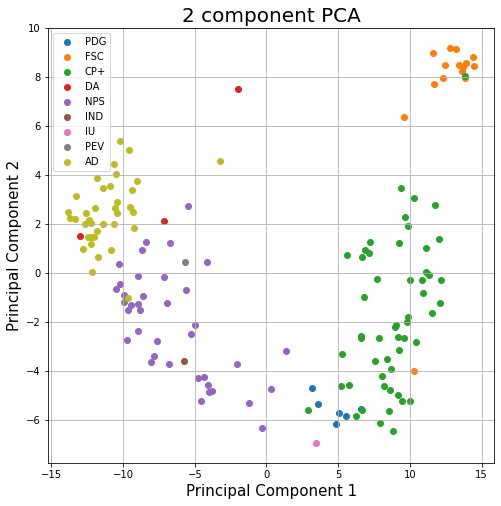

In [11]:
import matplotlib.pyplot as plt
import random
random.seed(12)
import pandas as pd

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors = []
for pacto in list_pactos:
  color = random.random()
  colors.append(color)
targets = list_pactos
for target, color in zip(targets, colors):
    indicesToKeep = diputados_sort_index.index[diputados_sort_index['pact']==target].tolist()
    # indicesToKeep = diputados_sort["pact"] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2'])
ax.legend(targets)
ax.grid()

### 2.2 Análisis del gráfico
Al visualizar el gráfico, identifica qué pactos se clusterizarían juntos al agrupar a los legisladores en dos bandos. Además, especula qué en cuántos clusters se podrían agrupar los legisladores considerando más de dos bandos.

[Respuesta]

Dos bandos:


*   Derecha:

1.   FSC
2.   CP+
3.   PDG
4.   IU


*   Izquierda

1.   NPS
2.   AD
3.   DA
4.   PEV
5.   IND



Por lo menos 4 bandos, ya que se pueden apreciar dos grupos relativamente grandes por cada lado (izquierda y derecha).





### 2.3 Función `clusterize`
Codifica una función que utiliza el modelo `GaussianMixture` de sklearn para separar a los legisladores en `n` grupos según sus votaciones. Debe retornar un dataframe que contenga la clasificación junto con el pacto y partido de cada uno de los legisladores. Corre el método con `n=2`.

In [12]:
info_gmm = info.copy()
info_gmm.sort_index()
# Orden por nombre

info_gmm["name"] = info_gmm.index
first_name = []
last_name = []
for x in info_gmm["name"]:
  name_list = x.split(',')
  lm = name_list[0]
  fm = name_list[1].strip()
  last_name.append(lm)
  first_name.append(fm)
info_gmm["last_name"] = last_name
info_gmm["fist_name"] = first_name
info_gmm = info_gmm.sort_values(by="last_name")
info_gmm = info_gmm.reset_index(drop = True)

In [13]:
from sklearn.mixture import GaussianMixture

def func(votos, info):
  gmm = GaussianMixture(2, random_state = 2433).fit(votos)
  gmm_pred = gmm.predict(votos)

  pca = PCA(n_components=2, random_state = 2433)
  pca.fit(votos)
  gmm_1_pca = pca.transform(votos)

  principalDf_1 = pd.DataFrame(data = gmm_1_pca, columns = ['principal component 1', 'principal component 2'])

  principalDf_1["gmm_pred"] = gmm_pred
  principalDf_1["pact"] =  info["pact"]
  principalDf_1["party"] = info["party"]
  principalDf_1["legislador_apellido"] = info["last_name"]
  principalDf_1["legislador_nombre"] = info_gmm["fist_name"]

  return principalDf_1

gmm_1 = func(X.copy(), info_gmm)
gmm_1

,principal component 1,principal component 2,gmm_pred,pact,party,legislador_apellido,legislador_nombre
0,-12.555972,2.465700,0,AD,PC,Acevedo Sáez,María Candelaria
1,-2.080996,-3.725709,0,NPS,DC,Aedo Jeldres,Eric
2,5.525829,-5.826019,1,PDG,PDG,Ahumada Palma,Yovana
3,9.368172,3.475532,1,CP+,UDI,Alessandri Vergara,Jorge
4,-4.167841,0.433686,0,NPS,PPD,Alinco Bustos,René
...,...,...,...,...,...,...,...
150,12.185747,-0.306141,1,CP+,UDI,Von Mühlenbrock Zamora,Gastón
151,11.313884,-0.102006,1,CP+,UDI,Weisse Novoa,Flor
152,-12.254878,1.453650,0,AD,CS,Winter Etcheberry,Gonzalo
153,-12.462351,1.451117,0,AD,CS,Yeomans Araya,Gael


### 2.4 Visualización con `GMM(n=2)`

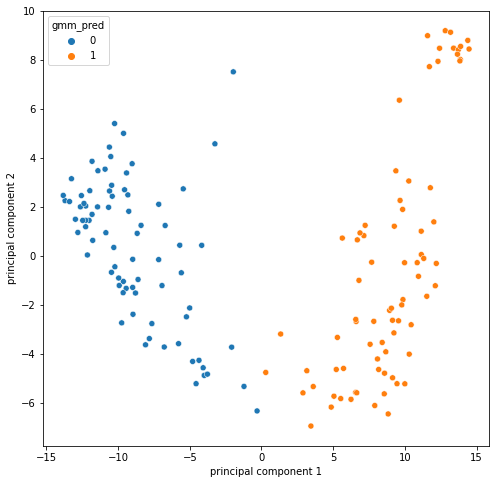

In [14]:
import seaborn as sns

fig = plt.gcf()
fig.set_size_inches(8, 8)
sns.scatterplot(data= gmm_1, y= 'principal component 2', x='principal component 1', hue='gmm_pred')

### 2.5 Preguntas con `GMM(n=2)`
#### 1. ¿Junto a qué partidos o pactos se agrupan los diputados del Partido de la Gente?
[Respuesta]

In [15]:
gmm_1[gmm_1['pact']=="PDG"]

,principal component 1,principal component 2,gmm_pred,pact,party,legislador_apellido,legislador_nombre
2,5.525829,-5.826019,1,PDG,PDG,Ahumada Palma,Yovana
8,3.606895,-5.334496,1,PDG,PDG,Arroyo Muñoz,Roberto
81,6.564675,-5.573858,1,PDG,PDG,Medina Vásquez,Karen
103,4.860956,-6.174259,1,PDG,PDG,Oyarzo Figueroa,Rubén Darío
105,5.052081,-5.729083,1,PDG,PDG,Pino Fuentes,Víctor Alejandro
118,3.160878,-4.688642,1,PDG,PDG,Rivas Sánchez,Gaspar


In [16]:
pactos_parties_1 = gmm_1[gmm_1['gmm_pred']==1][["pact", "party"]].copy()
pactos_parties_1["pact"].unique()

array(['PDG', 'CP+', 'FSC', 'NPS', 'IU'], dtype=object)

In [17]:
pactos_parties_1["party"].unique()

array(['PDG', 'UDI', 'REP', 'RN', 'DC', 'PCC', 'EVO', 'PR', 'PRI', 'CU'],
      dtype=object)

PDG se encuentra cerca de los pactos CP+, FSC, IU y NPS. Además, se encuentra cerca de los partidos UDI, RN, PCC, EVO, PRI y CU. No se toma en cuenta REP ya que a pesar de estar en el mismo bando, la distancia en los gráficos al analizar los componentes principales es demasiado grande para decir que se encuentran cerca. Se sabe que los diputados de REP se encuentran en la parte superior derecha del gráfico mientras que los de PDG se encuentran en el medio inferior, con una tendencia hacia la derecha.

In [47]:
gmm_1[gmm_1['party']=="REP"]

,principal component 1,principal component 2,gmm_pred,pact,party,legislador_apellido,legislador_nombre
6,12.811558,9.199849,1,FSC,REP,Araya Lerdo de Tejada,Cristián
10,13.391579,8.487208,1,FSC,REP,Barchiesi Chávez,Chiara
43,12.305443,7.947813,1,FSC,REP,De la Carrera Correa,Gonzalo
62,12.413547,8.483377,1,FSC,REP,Irarrázaval Rossel,Juan
65,11.704714,7.730434,1,FSC,REP,Jürgensen Rundshagen,Harry
66,14.383248,8.803458,1,FSC,REP,Kaiser Barents-Von Hohenhagen,Johannes
85,14.471167,8.451376,1,FSC,REP,Meza Pereira,José Carlos
92,11.578395,8.994934,1,FSC,REP,Moreno Bascur,Benjamín
97,9.612541,6.361560,1,FSC,REP,Naveillan Arriagada,Gloria
99,13.178450,9.136444,1,FSC,REP,Ojeda Rebolledo,Mauricio


#### 2. Dadas las clasificaciones, identifica si existen diputados que se clasifiquen en el cluster contrario al de la mayoría de su partido.

In [18]:
partidos = list(set(gmm_1["party"].tolist()))
diputados_distintos = pd.DataFrame(columns=["legislador_apellido", "legislador_nombre", "legislador_pred", "partido", "partido_pred"])
for partido in partidos:
  diputados = gmm_1.index[gmm_1['party']==partido].tolist()
  diputados_partido = gmm_1.loc[diputados]
  cluster_mayoria = int(diputados_partido["gmm_pred"].mode())
  for index, diputado in diputados_partido.iterrows():
    if int(diputado["gmm_pred"]) != cluster_mayoria:
      diputado_distinto = [[diputado["legislador_apellido"], diputado["legislador_nombre"],diputado["gmm_pred"], diputado["party"], cluster_mayoria]]
      diputados_distintos = diputados_distintos.append(pd.DataFrame(diputado_distinto, columns=["legislador_apellido", "legislador_nombre","legislador_pred", "partido", "partido_pred"]))
diputados_distintos

,legislador_apellido,legislador_nombre,legislador_pred,partido,partido_pred
0,Jouannet Valderrama,Andrés,1,PR,0
0,Calisto Águila,Miguel Ángel,1,DC,0


[Respuesta]
Los diputados que no se clasifiquen distinto que el cluster que la mayoría de los de sus partidos fueron:


1.   Miguel Calisto del partido DC
2.   Andrés Jouannet del partido PR

Ambos diputados se cambiaron hacia la oposición.

### 2.6 Evolución a lo largo del tiempo
Corre la función clusterize dividiendo a las votaciones según el mes en que se realizaron (hay 7 meses en total). Registra las clasificaciones de cada uno de los meses en un solo dataframe.

In [19]:
months = []
for date in votes["datetime"]:
  month = date[5:7]
  months.append(month)
votes_month = votes.copy()
votes_month["month"] = months
votes_month.head(2)

,datetime,description,type,month
38467,2022-03-16,La Cámara de Diputados manifiesta su más absol...,Proyecto Resolucion,03
38468,2022-03-16,La Cámara de Diputados manifiesta su más absol...,Proyecto Resolucion,03


In [20]:
votos_enero = votes_month[votes_month["month"] == "01"]
votos_febrero = votes_month[votes_month["month"] == "02"]
votos_marzo = votes_month[votes_month["month"] == "03"]
votos_abril = votes_month[votes_month["month"] == "04"]
votos_mayo = votes_month[votes_month["month"] == "05"]
votos_junio = votes_month[votes_month["month"] == "06"]
votos_julio = votes_month[votes_month["month"] == "07"]
votos_agosto = votes_month[votes_month["month"] == "08"]
votos_septiembre = votes_month[votes_month["month"] == "09"]
votos_octubre = votes_month[votes_month["month"] == "10"]
votos_noviembre = votes_month[votes_month["month"] == "11"]
votos_diciembre = votes_month[votes_month["month"] == "12"]

Se puede ver que en enero, febrero, octubre, noviembre y diciembre no hay votos emitidos.

In [21]:
votos_meses = [[votos_marzo, "marzo"], [votos_abril,"abril"], [votos_mayo,"mayo"], [votos_junio,"junio"], [votos_julio,"julio"], [votos_agosto, "agosto"], [votos_septiembre,"septiembre"]]

In [22]:
gmm_meses = []
for x in votos_meses:
  votos = x[0]
  mes = x[1]
  lista_index = votos.index.tolist()
  X_mes = X[lista_index]
  gmm_mes = func(X_mes, info_gmm)
  gmm_meses.append([gmm_mes, mes])
gmm_1_meses = gmm_1.copy()

for x in gmm_meses:
  if type(x) == type(list()):
    mes = x[1]
    gmm = x[0]
    gmm_1_meses[f"{mes}"] = gmm["gmm_pred"]

meses_problema = ["julio", "agosto"]
for mes in meses_problema:
  lista_mes = gmm_1_meses[f"{mes}"].tolist()
  lista_mes_correcta = [1 if x==0 else 0 for x in lista_mes]
  gmm_1_meses[f"{mes}"] = lista_mes_correcta
gmm_1_meses

,principal component 1,principal component 2,gmm_pred,pact,party,legislador_apellido,legislador_nombre,marzo,abril,mayo,junio,julio,agosto,septiembre
0,-12.555972,2.465700,0,AD,PC,Acevedo Sáez,María Candelaria,0,0,0,0,0,0,0
1,-2.080996,-3.725709,0,NPS,DC,Aedo Jeldres,Eric,0,0,0,0,0,0,1
2,5.525829,-5.826019,1,PDG,PDG,Ahumada Palma,Yovana,1,1,1,1,1,1,1
3,9.368172,3.475532,1,CP+,UDI,Alessandri Vergara,Jorge,1,1,1,1,1,1,1
4,-4.167841,0.433686,0,NPS,PPD,Alinco Bustos,René,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,12.185747,-0.306141,1,CP+,UDI,Von Mühlenbrock Zamora,Gastón,1,1,1,1,1,1,1
151,11.313884,-0.102006,1,CP+,UDI,Weisse Novoa,Flor,1,1,1,1,1,1,1
152,-12.254878,1.453650,0,AD,CS,Winter Etcheberry,Gonzalo,0,0,0,0,0,0,0
153,-12.462351,1.451117,0,AD,CS,Yeomans Araya,Gael,0,0,0,0,0,0,0


### 2.7 Visualización pre/post plebiscito
Analiza lo que ocurrió un mes antes y un mes después del plebiscito. Para eso, primero obtén solamente las votaciones de agosto, aplica el método `clusterize` y luego grafica las clasificaciones usando como base un PCA aplicado solamente a estas votaciones. Realiza lo mismo después para las votaciones de septiembre.

In [23]:
agosto = votos_meses[5]
septiembre = votos_meses[6]

Al hacer GMM sobre el mes de agosto, los clusters, en particular los colores y el número que los identifica se cambia con respecto a los demás meses. Esto se corrige al invertir la etiqueta de predicción.

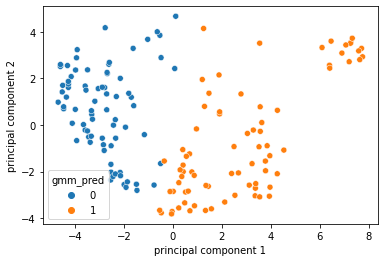

In [24]:
pca = PCA(n_components=2)
votos = agosto[0]
lista_index = votos.index.tolist()
X_mes = X[lista_index]
gmm_agosto = func(X_mes.copy(), info_gmm)
lista_mes = gmm_agosto["gmm_pred"].tolist()
lista_mes_correcta = [1 if x==0 else 0 for x in lista_mes]
gmm_agosto["gmm_pred"] = lista_mes_correcta

# gmm_agosto.describe()
sns.scatterplot(data=gmm_agosto, y= 'principal component 2', x='principal component 1', hue='gmm_pred')

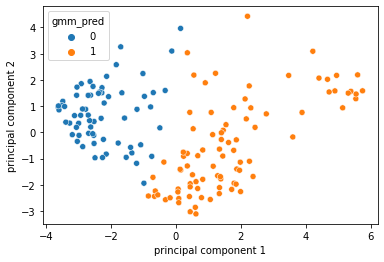

In [25]:
votos = septiembre[0]
lista_index = votos.index.tolist()
X_mes = X[lista_index]
gmm_septiembre = func(X_mes.copy(), info_gmm)

# gmm_septiembre.describe()
sns.scatterplot(data=gmm_septiembre, y= 'principal component 2', x='principal component 1', hue='gmm_pred')

In [26]:
print(gmm_septiembre["gmm_pred"].value_counts())

1    89
0    66
Name: gmm_pred, dtype: int64


### 2.8 Preguntas con `GMM(n=2)` mensual

#### 1. Analiza las distribuciones del poder. ¿Hay meses en que el sector asociado al oficialismo haya perdido la mayoría absoluta? ¿Si hubo, cuáles fueron?


In [27]:
for x in gmm_meses:
  votos = x[0]
  mes = x[1]
  votos_of = votos['gmm_pred'].value_counts().sort_index().iloc[0]
  votos_op = votos['gmm_pred'].value_counts().sort_index().iloc[1]
  print(f"Votos Oficialismo: {votos_of}")
  print(f"Votos Oposición: {votos_op}")
  if int(votos_of) < 78:
    print(f"En el mes de {mes} el oficialismo perdio la mayoría absoluta")
  print("\n")
  # print(votos)

Votos Oficialismo: 81
Votos Oposición: 74


Votos Oficialismo: 76
Votos Oposición: 79
En el mes de abril el oficialismo perdio la mayoría absoluta


Votos Oficialismo: 77
Votos Oposición: 78
En el mes de mayo el oficialismo perdio la mayoría absoluta


Votos Oficialismo: 78
Votos Oposición: 77


Votos Oficialismo: 81
Votos Oposición: 74


Votos Oficialismo: 77
Votos Oposición: 78
En el mes de agosto el oficialismo perdio la mayoría absoluta


Votos Oficialismo: 66
Votos Oposición: 89
En el mes de septiembre el oficialismo perdio la mayoría absoluta




[Respuesta]

El oficialismo perdio la mayoria absoluta los meses de abril, mayo, agosto y septiembre.

#### 2. Identifica a los diputados que en algún momento hayan migrado de un bando a otro. ¿A qué partido y pacto pertenecen en su mayoría?

In [28]:
# gmm_1_meses
diputados_cambiados = pd.DataFrame(columns=["legislador_apellido", "pact",	"party", "marzo",	"abril",	"mayo",	"junio",	"julio", "agosto",	"septiembre"])
meses = ["abril",	"mayo",	"junio",	"julio", "agosto",	"septiembre"]
gmm_cambios = gmm_1_meses[["legislador_apellido", "pact",	"party", "marzo",	"abril",	"mayo",	"junio",	"julio", "agosto",	"septiembre"]]
gmm_cambios
for index, diputado in gmm_cambios.iterrows():
  bando_inicial = diputado["marzo"]
  for mes in meses:
    if diputado[f"{mes}"] != bando_inicial:
      # print(diputado)
      diputados_cambiados = diputados_cambiados.append(diputado)
      break
diputados_cambiados[["pact", "party"]].value_counts()

pact  party
NPS   DC       4
      PPD      4
DA    PH       2
NPS   PL       2
      PR       2
PDG   PDG      2
AD    COM      1
      PC       1
CP+   EVO      1
      RN       1
NPS   CIU      1
dtype: int64

[Respuesta]
En su mayoría son del pacto "Nuevo Pacto Social", siendo la mayoría del partido DC y PPD.

#### 3. Al analizar los gráficos y las clasificaciones entregadas por GMM, ¿cómo cambió el Congreso entre agosto y septiembre?

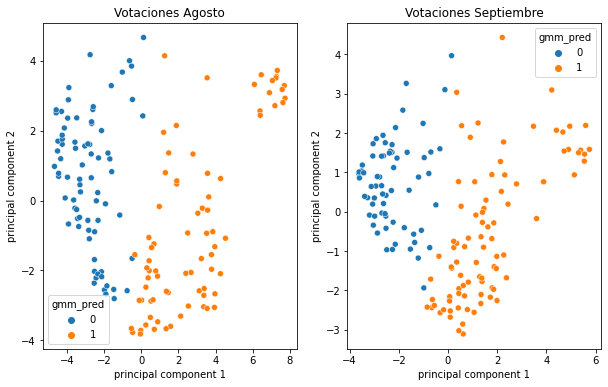

In [29]:

fig, ax =plt.subplots(1,2, figsize=(10,6))
sns.scatterplot(data=gmm_agosto, y= 'principal component 2', x='principal component 1', hue='gmm_pred', ax=ax[0]).set(title='Votaciones Agosto')
sns.scatterplot(data=gmm_septiembre, y= 'principal component 2', x='principal component 1', hue='gmm_pred', ax=ax[1]).set(title='Votaciones Septiembre')
fig.show()


In [30]:
gmm_agosto["gmm_pred"].value_counts()

0    78
1    77
Name: gmm_pred, dtype: int64

In [31]:
gmm_septiembre["gmm_pred"].value_counts()

1    89
0    66
Name: gmm_pred, dtype: int64

Se puede ver que el congreso cambio entre agosto y septiembre de manera significante. La cantidad de votos del oficialismo disminuyo en más del 10% y en los gráficos se puede apreciar una tendencia hacia el lado de la derecha (oposición) en los votos. Esto se puede adjudicar a los resultados del plebisito, los que beneficiarion a la oposición.

También se puede notar como los grupos se condensaron, agrupandose más en general en septiembre que en agosto.

# 3. Bayesian Gaussian Mixtures (2 ptos)

### 3.1 Determinación de cantidad de clusters
Determina una cantidad razonable de clusters utilizando Bayesian Gaussian Mixtures. Justifica tu decisión. (Hint: corre el modelo considerando un `n` más grande del que crees que hay y considera como irrelevante clusters con pesos menores o cercanos a 5-7%). 

In [32]:
from sklearn.mixture import BayesianGaussianMixture
for x in range(2,8):
  bgm = BayesianGaussianMixture(n_components = x, random_state = 2133).fit(X)
  for weight in bgm.weights_:
    print(f"El peso de uno de los {x} componentes es {round(weight,4)*100}%")
  print("\n")


El peso de uno de los 2 componentes es 50.63999999999999%
El peso de uno de los 2 componentes es 49.36%


El peso de uno de los 3 componentes es 49.35%
El peso de uno de los 3 componentes es 30.380000000000003%
El peso de uno de los 3 componentes es 20.26%


El peso de uno de los 4 componentes es 49.35%
El peso de uno de los 4 componentes es 23.419999999999998%
El peso de uno de los 4 componentes es 17.94%
El peso de uno de los 4 componentes es 9.29%


El peso de uno de los 5 componentes es 23.72%
El peso de uno de los 5 componentes es 22.25%
El peso de uno de los 5 componentes es 18.22%
El peso de uno de los 5 componentes es 9.879999999999999%
El peso de uno de los 5 componentes es 25.94%


El peso de uno de los 6 componentes es 23.72%
El peso de uno de los 6 componentes es 10.17%
El peso de uno de los 6 componentes es 17.630000000000003%
El peso de uno de los 6 componentes es 9.94%
El peso de uno de los 6 componentes es 26.3%
El peso de uno de los 6 componentes es 12.24%


El peso de

[Respuesta]

Se puede apreciar que 6 componentes es una cantidad razonable de clusteres, pues tener más de 6 produce que el peso de ciertos clusters sea cercano al 6%. Cabe mencionar que debido al grado de aleatoriedad de BGM, la cantidad de clusters ópitmo puede variar según que random_state se utilice.

### 3.2 Visualiación de `n` óptimo
Dado el `n` que elegiste, obtén los clusters usando `GaussianMixtures` y grafícalos usando la reducción de dimensionalidad.

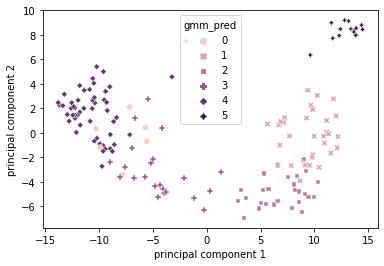

In [33]:
gmm = GaussianMixture(6, random_state = 2433).fit(X)
gmm_pred = gmm.predict(X)

pca.fit(X)
gmm_1_pca = pca.transform(X)

principalDf_3 = pd.DataFrame(data = gmm_1_pca, columns = ['principal component 1', 'principal component 2'])

principalDf_3["gmm_pred"] = gmm_pred
principalDf_3["pact"] =  info_gmm["pact"]
principalDf_3["party"] = info_gmm["party"]
principalDf_3["legislador_apellido"] = info_gmm["last_name"]
sns.scatterplot(data= principalDf_3, y= 'principal component 2', x='principal component 1', hue='gmm_pred', style="gmm_pred")

In [34]:
principalDf_3

,principal component 1,principal component 2,gmm_pred,pact,party,legislador_apellido
0,-12.555972,2.465701,4,AD,PC,Acevedo Sáez
1,-2.080996,-3.725710,3,NPS,DC,Aedo Jeldres
2,5.525829,-5.826020,2,PDG,PDG,Ahumada Palma
3,9.368172,3.475531,1,CP+,UDI,Alessandri Vergara
4,-4.167841,0.433687,3,NPS,PPD,Alinco Bustos
...,...,...,...,...,...,...
150,12.185747,-0.306141,1,CP+,UDI,Von Mühlenbrock Zamora
151,11.313884,-0.102006,1,CP+,UDI,Weisse Novoa
152,-12.254878,1.453649,4,AD,CS,Winter Etcheberry
153,-12.462351,1.451116,4,AD,CS,Yeomans Araya


### 3.3 Análisis de los clusters
Para cada uno de los clusters, identifica los partidos mayoritarios de cada uno. Realiza dos conclusiones políticas a partir de los resultados.

In [35]:
principalDf_3
for pred in range(0,6): 
  df_cluster = principalDf_3.loc[principalDf_3['gmm_pred'] == pred]
  # gmm_1[gmm_1['gmm_pred']==1][["pact", "party"]].copy()
  print(f"Cluster {pred}:")
  print(df_cluster["party"].unique())
  print(df_cluster["party"].value_counts())
  print()

Cluster 0:
['PPD' 'PEV' 'PH' 'PS']
PPD    2
PEV    2
PH     1
PS     1
Name: party, dtype: int64

Cluster 1:
['UDI' 'RN' 'EVO' 'PRI']
UDI    23
RN      4
EVO     4
PRI     1
Name: party, dtype: int64

Cluster 2:
['PDG' 'RN' 'PCC' 'CU']
RN     20
PDG     6
PCC     1
CU      1
Name: party, dtype: int64

Cluster 3:
['DC' 'PPD' 'PH' 'PL' 'IND' 'PS' 'PR' 'CIU']
DC     8
PL     4
PR     4
PPD    2
PS     2
PH     1
IND    1
CIU    1
Name: party, dtype: int64

Cluster 4:
['PC' 'PS' 'CS' 'RD' 'FRVS' 'COM' 'PPD' 'PH']
PC      12
PS      10
CS       9
RD       8
COM      6
PPD      3
FRVS     2
PH       1
Name: party, dtype: int64

Cluster 5:
['REP' 'RN']
REP    14
RN      1
Name: party, dtype: int64



[Respuesta]
Para el cluster 0, los partidos mayoritarios son el PPD y el PEV.


Para el cluster 1, el partido mayoritario es el partido UDI.

Para el cluster 2, el partido mayoritario es el partido RN.

Para el cluster 3, el partido mayoritario es el partido DC.

Para el cluster 4, el partido mayoritario es el partido PC.

Para el cluster 5, el partido mayoritario es el partido REP.

Una conclusión que se puede obtener es que el partido Republicano (REP) se encuentra casi solitario en su cluster, lo que indica tendencias de voto más extremistas en comparación con el resto de los partidos, tanto de su bando como los demás.
Otra conclusión es que los cluster 3 y 4, que son compuestos por partidos del oficialismo, están fragmentados, pues poseen una gran variedad de partidos. Esto nos indica que si bien existen muchos partidos del oficialismo, muchos de ellos piensan de forma parecida la agruparse en los mismos clusters.

### 3.4 Detección de Anomalías `GMM(n=2)`
Para un modelo GMM de dos clusters, identifica los diputados pertenecientes al 2% con menor log-likelihood, lo que indica que son más propensos a ser outliers.

In [36]:
gmm = GaussianMixture(2, random_state = 2433).fit(X)
gmm_scores = gmm.score_samples(X)
# print(gmm_scores)
df_scores = pd.DataFrame(gmm_scores)
df_scores.describe()

,0
count,155.000000
mean,2690.799902
std,0.759300
min,2690.047871
25%,2690.047910
50%,2690.048200
75%,2691.561641
max,2691.561772


In [37]:
df_scores.quantile(0.02)

0    2690.047884
Name: 0.02, dtype: float64

In [38]:
diputados_2_ps = df_scores.loc[df_scores[0] <= 2690.047884].index
info_gmm.iloc[list(diputados_2_ps)]

,shortname,district,pact,party,name,last_name,fist_name
4,Rene Alinco,27,NPS,PPD,"Alinco Bustos, René",Alinco Bustos,René
54,Felix Gonzalez,20,PEV,PEV,"González Gatica, Félix",González Gatica,Félix
63,Pamela Jiles,12,DA,PH,"Jiles Moreno, Pamela",Jiles Moreno,Pamela
86,Vlado Mirosevic,1,NPS,PL,"Mirosevic Verdugo, Vlado",Mirosevic Verdugo,Vlado


### 3.5 Detección de Anomalías `GMM(n)`
Realiza lo mismo pero siendo `n` la cantidad de clusters que identificaste con `BayesianGaussianMixtures`.

In [39]:
gmm_6 = GaussianMixture(4, random_state = 69).fit(X)
gmm_scores_bgm = gmm_6.score_samples(X)
# print(gmm_scores)
df_scores_bgm = pd.DataFrame(gmm_scores_bgm)
df_scores_bgm.describe()
# x = info_gmm.loc[info_gmm["fist_name"]=="Pamela"]
# print(x.index)

,0
count,155.000000
mean,2801.801489
std,135.780061
min,2724.435455
25%,2724.435490
50%,2785.104589
75%,2785.104605
max,3220.769593


In [40]:
df_scores_bgm.quantile(0.02)

0    2724.435466
Name: 0.02, dtype: float64

In [41]:
diputados_2_ps_6 = df_scores_bgm.loc[df_scores_bgm[0] <= 2724.4354665].index
# print(diputados_2_ps_6)
info_gmm.iloc[list(diputados_2_ps_6)]

,shortname,district,pact,party,name,last_name,fist_name
4,Rene Alinco,27,NPS,PPD,"Alinco Bustos, René",Alinco Bustos,René
45,Viviana Delgado,8,PEV,PEV,"Delgado Riquelme, Viviana",Delgado Riquelme,Viviana
86,Vlado Mirosevic,1,NPS,PL,"Mirosevic Verdugo, Vlado",Mirosevic Verdugo,Vlado
87,Claudia Mix,8,AD,COM,"Mix Jiménez, Claudia",Mix Jiménez,Claudia
